In [ ]:
# Naive Bayes - Similar to KNN but more grounded towards probabilities
# Naive , Bayes

# email is spam or not ?
# ex : free money ! click here
# ex : cash deposited, check here

# ex : hey ! good morning

# P(Spam) = 2/3
# P(not Spam) = 1/3

''' Rule based
if 'money' and 'free' in message:
    return True
else :
    return  False
'''

# P(data/Spam), P('free'/spam) = 1/2 = 50%. no of spam msgs that contain your word / total spam messages
# p('money' /spam) = 1/2 = 50%

''' Prob based
for word in message:
    find P(word/spam) >= 50;
    return True
else :
    return  False
'''

# Why Naive ?
# Because its assume there no correlation between words
# P(money/Spam), P(cash/Spam)

# P(money/Spam) = 1 (this is not the case)
# P(money/Spam) = 0.5, P(cash/Spam) = 0.5

# Why Bayes ?
# Because it uses Bayes Theorem
# P(C/X) = P(X/C)*P(C)/P(X)
# P(Spam/message) = P(message/Spam)*P(Spam)/P(message)
# P(money/Spam) directly prob P(message/Spam)*P(Spam)

# prediction = P(Spam/message) (Posterior)
# P(message/Spam) = (Likelyhood)
# P(Spam) = (Prior)

# Posterior = Likelyhood*Prior
# log(Posterior) = log(Likelyhood * Prior) = log(Likelyhood) + log(Prior)
# log(Posterior) = log(Likelyhood) + log(Prior)

# Likelyhood = P(data/C) (modelling data) .pdf (probability distribution function)

# continuos values = p(data/C) = pdf
# discrete values = p(message/C) * p('free money here'/C) = p('free'/C)*p('money'/c)
# ..................................................................................................................

# Discriminative vs Generative Models ?
# Discriminative = directly try to improve models prediction
# models prediction = P(class/data)
# examples : all neural networks

# Generative = understand/model the data
# Maximize = P(class/data)

# P(class/data) directly prob P(class/data)*P(class)


' Prob based\nfor word in message:\n    find P(word/spam) >= 50;\n    return True\nelse :\n    return  False\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv" , header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.shape

(20000, 785)

In [ ]:
X = data.iloc[:, 1:].values 
Y = data.iloc[:, 0].values 

X.shape, Y.shape

((20000, 784), (20000,))

0


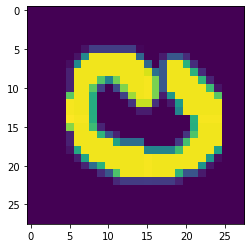

7


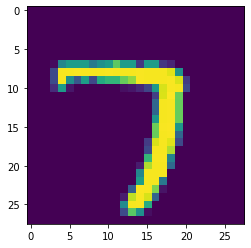

9


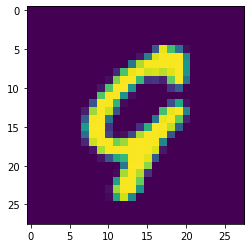

5


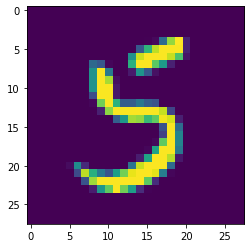

3


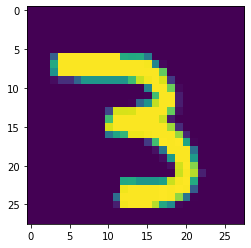

0


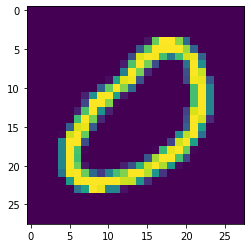

6


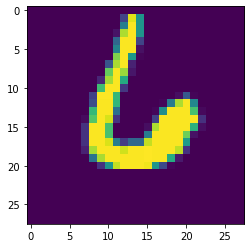

2


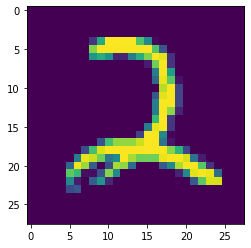

8


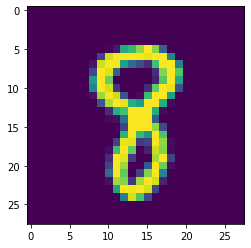

0


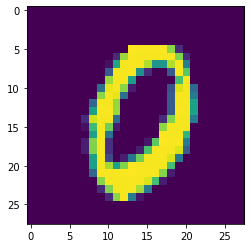

In [ ]:
for i in range(10):
  rand_idx = np.random.choice(X.shape[0])
  print(Y[rand_idx])
  plt.imshow(X[rand_idx].reshape(28, 28))
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

print(X.shape)

(20000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)
Xtrain.shape, Ytrain.shape

((16000, 784), (16000,))

In [ ]:
Xtest.shape, Ytest.shape

((4000, 784), (4000,))

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model = GaussianNB()
%time model.fit(Xtrain, Ytrain)

CPU times: user 174 ms, sys: 2.48 ms, total: 177 ms
Wall time: 177 ms


GaussianNB()

In [ ]:
model.score(Xtest, Ytest)

0.83525

In [ ]:
model = MultinomialNB()
%time model.fit(Xtrain, Ytrain)


CPU times: user 160 ms, sys: 13.3 ms, total: 173 ms
Wall time: 125 ms


MultinomialNB()

In [ ]:
model.score(Xtest, Ytest)

0.83525

In [ ]:
model = BernoulliNB()
%time model.fit(Xtrain, Ytrain)

CPU times: user 239 ms, sys: 5.19 ms, total: 244 ms
Wall time: 189 ms


BernoulliNB()

In [ ]:
model.score(Xtest, Ytest)

0.8385